Kurs USD:
[{'no': '169/A/NBP/2019', 'effectiveDate': '2019-09-02', 'mid': 3.9819}, {'no': '170/A/NBP/2019', 'effectiveDate': '2019-09-03', 'mid': 3.9882}, {'no': '171/A/NBP/2019', 'effectiveDate': '2019-09-04', 'mid': 3.9414}, {'no': '172/A/NBP/2019', 'effectiveDate': '2019-09-05', 'mid': 3.933}]




  effectiveDate     mid              no
0    2019-09-02  3.9819  169/A/NBP/2019
1    2019-09-03  3.9882  170/A/NBP/2019
2    2019-09-04  3.9414  171/A/NBP/2019
3    2019-09-05  3.9330  172/A/NBP/2019


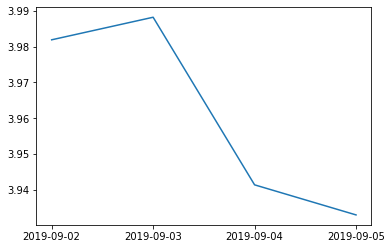





Mediana USD
3.9616499999999997




Index na dacie:
                  mid              no
effectiveDate                        
2019-09-02     3.9819  169/A/NBP/2019
2019-09-03     3.9882  170/A/NBP/2019
2019-09-04     3.9414  171/A/NBP/2019
2019-09-05     3.9330  172/A/NBP/2019


-------------------


Kurs EUR:
[{'no': '169/A/NBP/2019', 'effectiveDate': '2019-09-02', 'mid': 4.3691}, {'no': '170/A/NBP/2019', 'effectiveDate': '2019-09-03', 'mid': 4.3667}, {'no': '171/A/NBP/2019', 'effectiveDate': '2019-09-04', 'mid': 4.3385}, {'no': '172/A/NBP/2019', 'effectiveDate': '2019-09-05', 'mid': 4.3409}]




  effectiveDate     mid              no
0    2019-09-02  4.3691  169/A/NBP/2019
1    2019-09-03  4.3667  170/A/NBP/2019
2    2019-09-04  4.3385  171/A/NBP/2019
3    2019-09-05  4.3409  172/A/NBP/2019


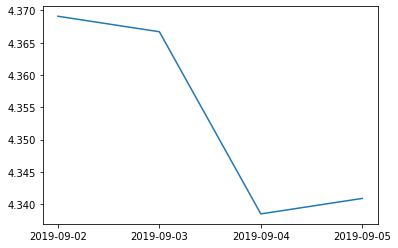





Mediana EUR
4.3538


Index na dacie:
                  mid              no
effectiveDate                        
2019-09-02     4.3691  169/A/NBP/2019
2019-09-03     4.3667  170/A/NBP/2019
2019-09-04     4.3385  171/A/NBP/2019
2019-09-05     4.3409  172/A/NBP/2019


-------------------




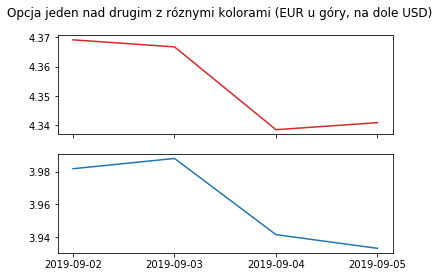

In [18]:
#zadanie1

#funkcja importu kursu
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

def wczytajwal (waluta, od, do):
    
    
    
    currency_req = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/'+waluta+'/'+od+'/'+do+'/')

    currency_data = currency_req.json()
    return currency_data['rates']


#USD

#--Kursy
print("Kurs USD:")
print(wczytajwal('USD','2019-09-01','2019-09-05'))
print('\n')
print('\n')

#--wykres
kursy_usd_wrzesien = pd.DataFrame.from_dict(wczytajwal('USD','2019-09-01','2019-09-05'))
print(kursy_usd_wrzesien.head())

dane_wykres = kursy_usd_wrzesien.set_index(['effectiveDate'])['mid']

plt.plot(dane_wykres)
plt.show()
print('\n')
print('\n')

#mediana

lista_dla_numpy = [dane_wykres]

print("Mediana USD")
print(np.median(lista_dla_numpy))

print('\n')
print('\n')

#index data

print('Index na dacie:')
kursy_usd_wrzesien.set_index(['effectiveDate'], inplace=True)
print(kursy_usd_wrzesien.head())

print('\n')
print('-------------------')
print('\n')

#EUR

#--Kurds
print("Kurs EUR:")
print(wczytajwal('EUR','2019-09-01','2019-09-05'))
print('\n')
print('\n')

#--wykres
kursy_EUR_wrzesien = pd.DataFrame.from_dict(wczytajwal('EUR','2019-09-01','2019-09-05'))
print(kursy_EUR_wrzesien.head())

dane_wykres_eur = kursy_EUR_wrzesien.set_index(['effectiveDate'])['mid']

plt.plot(dane_wykres_eur)
plt.show()
print('\n')
print('\n')

#mediana

lista_dla_numpy_eur = [dane_wykres_eur]

print("Mediana EUR")
print(np.median(lista_dla_numpy_eur))
print('\n')


#index data

print('Index na dacie:')
kursy_EUR_wrzesien.set_index(['effectiveDate'], inplace=True)
print(kursy_EUR_wrzesien.head())

print('\n')
print('-------------------')
print('\n')


#subplot
wykres, (gora, dol) = plt.subplots(2, sharex=True)
wykres.suptitle('Opcja jeden nad drugim z róznymi kolorami (EUR u góry, na dole USD)')
dol.plot(dane_wykres, 'tab:blue')
gora.plot(dane_wykres_eur, 'tab:red')
plt.show()




In [19]:
# Zadanie 1
# 1. Napisz funkcję do wczytywania waluty nbp z zadanego okresu (wszystko przekazywane jako parametr)
#    dowolny ze sposobów (plik csv, read_json, dowolne inne)
# 2. Używając stworzonej funkcji wczytaj dane dwóch wybranych przez siebie kursów
# 3. Zbadaj wczytane dane za pomocą wybranych poleceń, oczyść jeżeli to konieczne i ustaw indeksy na datę.
#    Plus za konwersję do typu data/czas
# 4. Użyj funkcji corrcoef z pakietu numpy żeby obliczyć wzajemną korelację wybranych kursów
# 5. Zweryfikuj związek z punktu wyżej rysując wykresy obydwu wybranych przez siebie walut
#    Plus za wykorzystanie funkcji plt.subplot()